# The Sparks Foundation

### Graduate Rotational Internship Program (GRIP)

#### April 2023 batch

# Candidate Name : Shweta Kulkarni

# Task 7 : Stock Market Prediction

#### Objective of the Task is to Create a Hybrid Model for Stock Price/ Performance Prediction Using Numerical Analysis of Historical Stock Prices and Sentimantal Analysis of News Headlines

In [1]:
# Import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
df=pd.read_csv("stock_price.csv")

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [4]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1953,2022-12-09,62735.421875,61889.109375,62690.859375,62181.671875,7300.0,62181.671875
1954,2022-12-12,62239.421875,61676.148438,61770.558594,62130.570312,7000.0,62130.570312
1955,2022-12-13,62567.921875,62129.570312,62300.671875,62533.300781,12000.0,62533.300781
1956,2022-12-14,62835.109375,62591.281250,62685.941406,62677.910156,5700.0,62677.910156
1957,2022-12-15,62624.808594,61715.609375,62530.070312,61799.031250,5600.0,61799.031250


In [5]:
df.shape

(1958, 7)

In [6]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1958 non-null   object 
 1   High       1958 non-null   float64
 2   Low        1958 non-null   float64
 3   Open       1958 non-null   float64
 4   Close      1958 non-null   float64
 5   Volume     1958 non-null   float64
 6   Adj Close  1958 non-null   float64
dtypes: float64(6), object(1)
memory usage: 107.2+ KB


In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1958.000000,1958.000000,1958.000000,1958.000000,1.958000e+03,1958.000000
mean,38634.890940,38178.314566,38446.976897,38404.888066,1.762398e+05,38404.888066
std,11204.551714,11082.567981,11147.433992,11152.488063,1.687081e+06,11152.488063
min,23142.960938,22494.609375,23060.390625,22951.830078,0.000000e+00,22951.830078
25%,28863.078125,28509.964355,28736.029785,28678.103027,9.300000e+03,28678.103027
50%,35839.054688,35494.445312,35736.935547,35691.060547,1.230000e+04,35691.060547
75%,47046.553711,46425.786133,46766.612305,46822.384766,1.750000e+04,46822.384766
max,63583.070312,63183.769531,63357.988281,63284.191406,3.181510e+07,63284.191406


In [9]:
# Missing values in data
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [10]:
df['Date'].value_counts()

2015-01-02    1
2020-05-18    1
2020-05-14    1
2020-05-13    1
2020-05-12    1
             ..
2017-08-22    1
2017-08-21    1
2017-08-18    1
2017-08-17    1
2022-12-15    1
Name: Date, Length: 1958, dtype: int64

<AxesSubplot:>

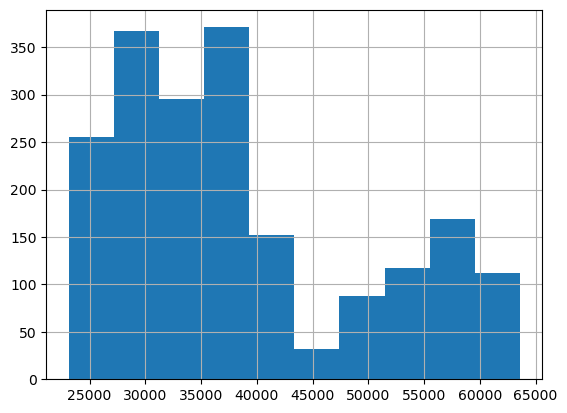

In [11]:
df['High'].hist()

<AxesSubplot:>

<Figure size 2000x800 with 0 Axes>

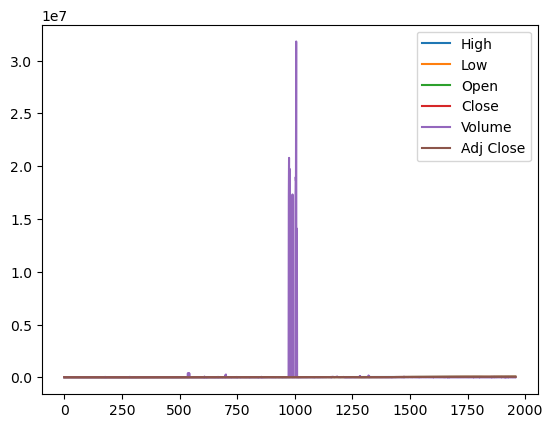

In [12]:
plt.figure(figsize=(20,8))
df.plot()

In [13]:
import math

In [14]:
data=df.filter(['close'])
dataset=df.values
training_data_len=math.ceil(len(df)*8)
training_data_len

15664

In [15]:
dataset

array([['2015-01-02', 27937.470703125, 27519.259765625, ...,
        27887.900390625, 7400.0, 27887.900390625],
       ['2015-01-05', 28064.490234375, 27786.849609375, ...,
        27842.3203125, 9200.0, 27842.3203125],
       ['2015-01-06', 27698.9296875, 26937.060546875, ..., 26987.4609375,
        14100.0, 26987.4609375],
       ...,
       ['2022-12-13', 62567.921875, 62129.5703125, ..., 62533.30078125,
        12000.0, 62533.30078125],
       ['2022-12-14', 62835.109375, 62591.28125, ..., 62677.91015625,
        5700.0, 62677.91015625],
       ['2022-12-15', 62624.80859375, 61715.609375, ..., 61799.03125,
        5600.0, 61799.03125]], dtype=object)

In [16]:
df=df.iloc[:,0:5]
df

,Date,High,Low,Open,Close
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938
...,...,...,...,...,...
1953,2022-12-09,62735.421875,61889.109375,62690.859375,62181.671875
1954,2022-12-12,62239.421875,61676.148438,61770.558594,62130.570312
1955,2022-12-13,62567.921875,62129.570312,62300.671875,62533.300781
1956,2022-12-14,62835.109375,62591.281250,62685.941406,62677.910156


In [17]:
training_set=df.iloc[:,1:2].values
training_set

array([[27937.47070312],
       [28064.49023438],
       [27698.9296875 ],
       ...,
       [62567.921875  ],
       [62835.109375  ],
       [62624.80859375]])

#### Scaling the Dataset

In [18]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
data_training_scaled=scalar.fit_transform(training_set)

In [19]:
feature_set=[]
labels=[]
for i in range (60,586):
  feature_set.append(data_training_scaled[i-60:i,0])
  labels.append(data_training_scaled[i,0])

In [20]:
features_set,labels=np.array(feature_set),np.array(labels)

In [21]:
features_set=np.reshape(features_set,(features_set.shape[0],features_set.shape[1],1))
features_set.shape

(526, 60, 1)

#### Building The LSTM

In [23]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [24]:
model=Sequential()

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
model.fit(features_set,labels,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 18s 49ms/step - loss: 9.4074e-04
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 9.4074e-04
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 11/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04
Epoch 12/50
27/27 [==============================] - 0s 2ms/step - loss: 9.4074e-04

In [27]:
data_testing_complete=pd.read_csv('stock_price.csv')
data_testing_processed=data_testing_complete.iloc[:,1:2]
data_testing_processed

,High
0,27937.470703
1,28064.490234
2,27698.929688
3,27051.599609
4,27316.410156
...,...
1953,62735.421875
1954,62239.421875
1955,62567.921875
1956,62835.109375


#### Prediction of Data

In [28]:
data_total=pd.concat((df['Open'],df['Open']),axis=0)

In [29]:
test_inputs=data_total[len(data_total)-len(df)-60:].values
test_inputs.shape

(2018,)

In [30]:
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scalar.transform(test_inputs)

In [31]:
test_features=[]
for i in range(60,89):
  test_features.append(test_inputs[i-60:i,0])

In [32]:
test_features=np.array(test_features)
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))
test_features.shape

(29, 60, 1)

In [33]:
predictions=model.predict(test_features)

In [34]:
predictions

array([[[0.9004414 ],
        [0.89913654],
        [0.8884961 ],
        ...,
        [0.96828896],
        [0.97781587],
        [0.9739615 ]],

       [[0.89913654],
        [0.8884961 ],
        [0.88679826],
        ...,
        [0.97781587],
        [0.9739615 ],
        [0.10826673]],

       [[0.8884961 ],
        [0.88679826],
        [0.85019726],
        ...,
        [0.9739615 ],
        [0.10826673],
        [0.11957111]],

       ...,

       [[0.905137  ],
        [0.91750497],
        [0.93774766],
        ...,
        [0.14266579],
        [0.14216702],
        [0.13411286]],

       [[0.91750497],
        [0.93774766],
        [0.9400056 ],
        ...,
        [0.14216702],
        [0.13411286],
        [0.12313319]],

       [[0.93774766],
        [0.9400056 ],
        [0.9240482 ],
        ...,
        [0.13411286],
        [0.12313319],
        [0.13123849]]], dtype=float32)

In [35]:
x_train=df[0:1256]
y_train=df[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [36]:
x_train

,Date,High,Low,Open,Close
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938
...,...,...,...,...,...
1251,2020-02-07,41394.410156,41073.359375,41394.410156,41141.851562
1252,2020-02-10,41172.058594,40798.980469,41166.718750,40979.621094
1253,2020-02-11,41444.339844,41179.140625,41183.390625,41216.140625
1254,2020-02-12,41671.859375,41330.851562,41330.851562,41565.898438


In [37]:
np.random.seed(1)
np.random.randn(3,3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

#### Draw single number from the normal distribution

In [38]:
np.random.normal(1)

0.7506296245225899

#### Draw 5 number from normal distribution

In [39]:
np.random.normal(5)

6.4621079370449745

In [40]:
np.random.seed(42)
np.random.normal(size=1000,scale=100).std()

97.87262077473541

#### Plotting Results

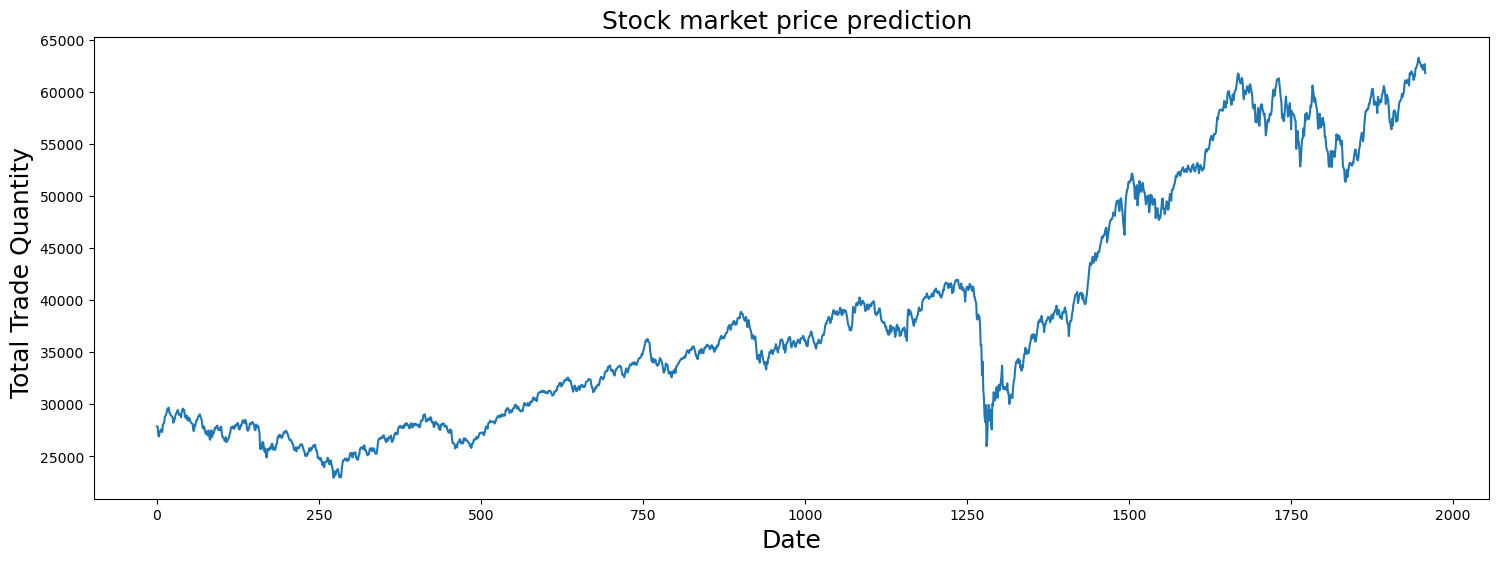

In [41]:
plt.figure(figsize=(18,6))
plt.title("Stock market price prediction ",fontsize=18)

plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity ',fontsize=18)
plt.show()

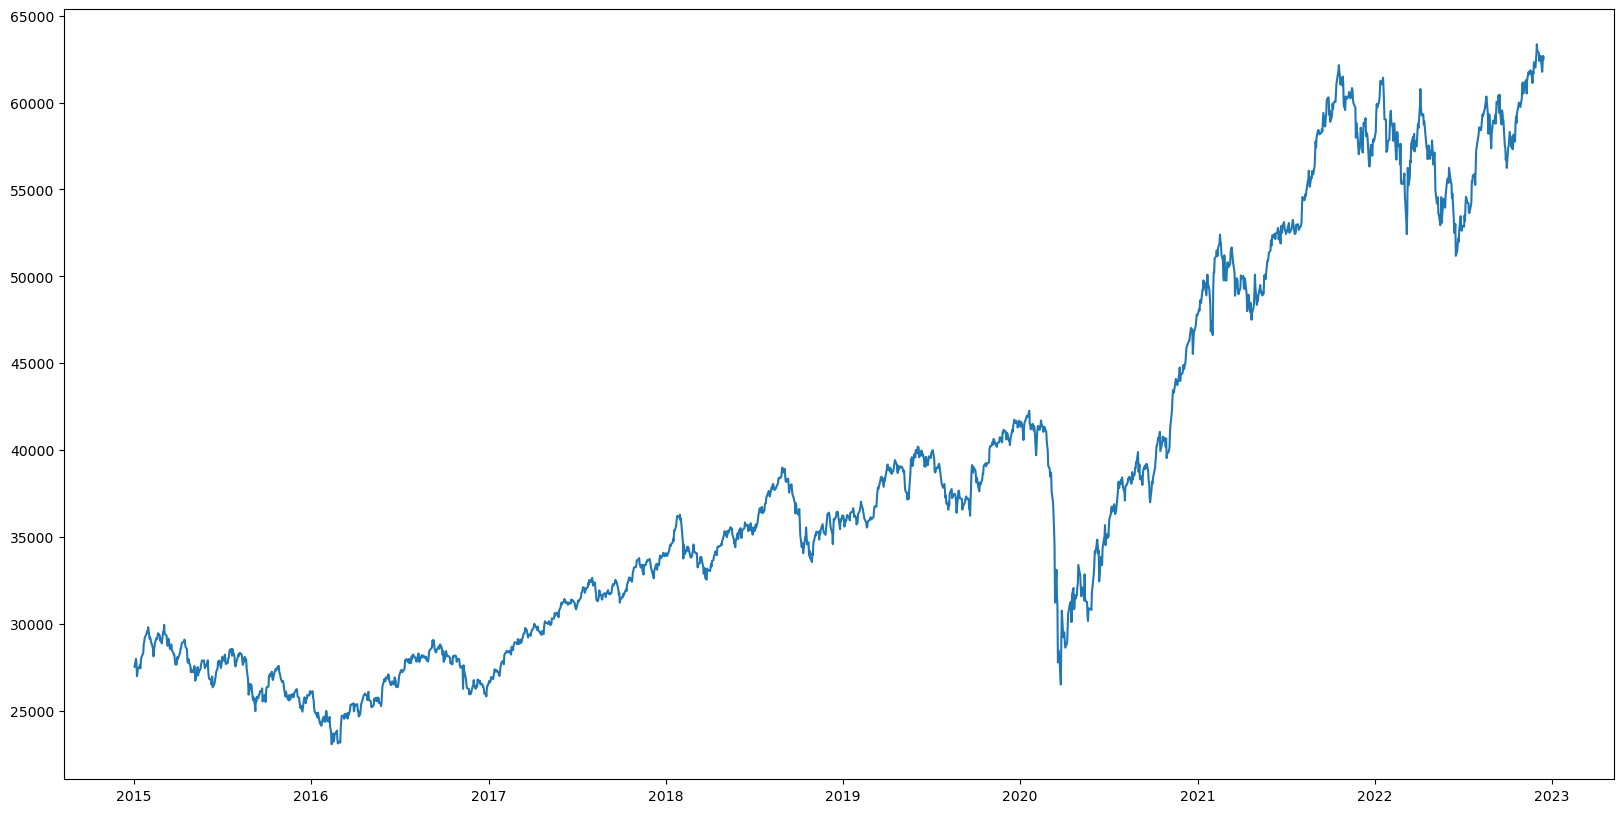

In [42]:
#Analysing closing prices from dataframe
df['Date']=pd.to_datetime(df.Date)
df.index=df['Date']

plt.figure(figsize=(20,10))
plt.plot(df['Open'],label='ClosePriceHist')

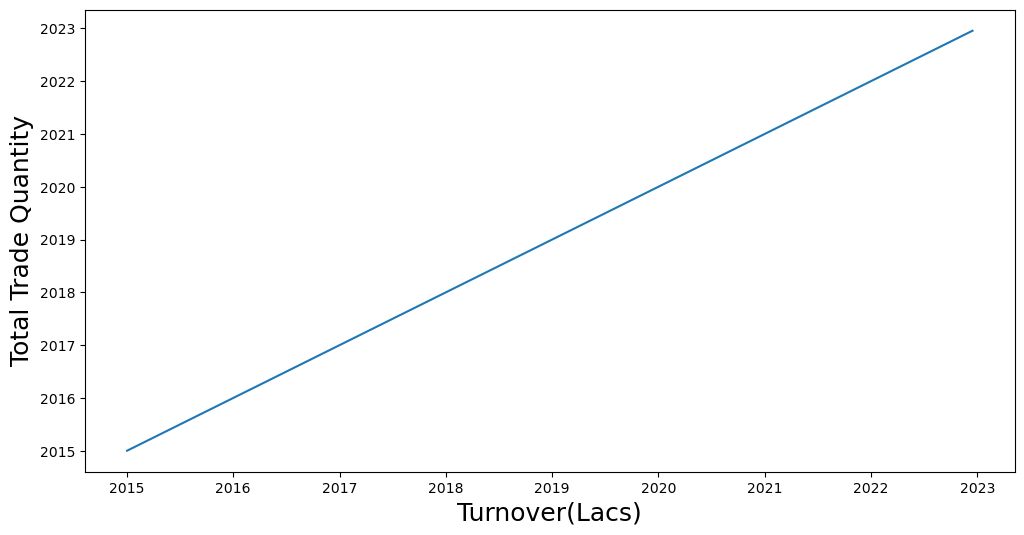

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'])
plt.xlabel('Turnover(Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

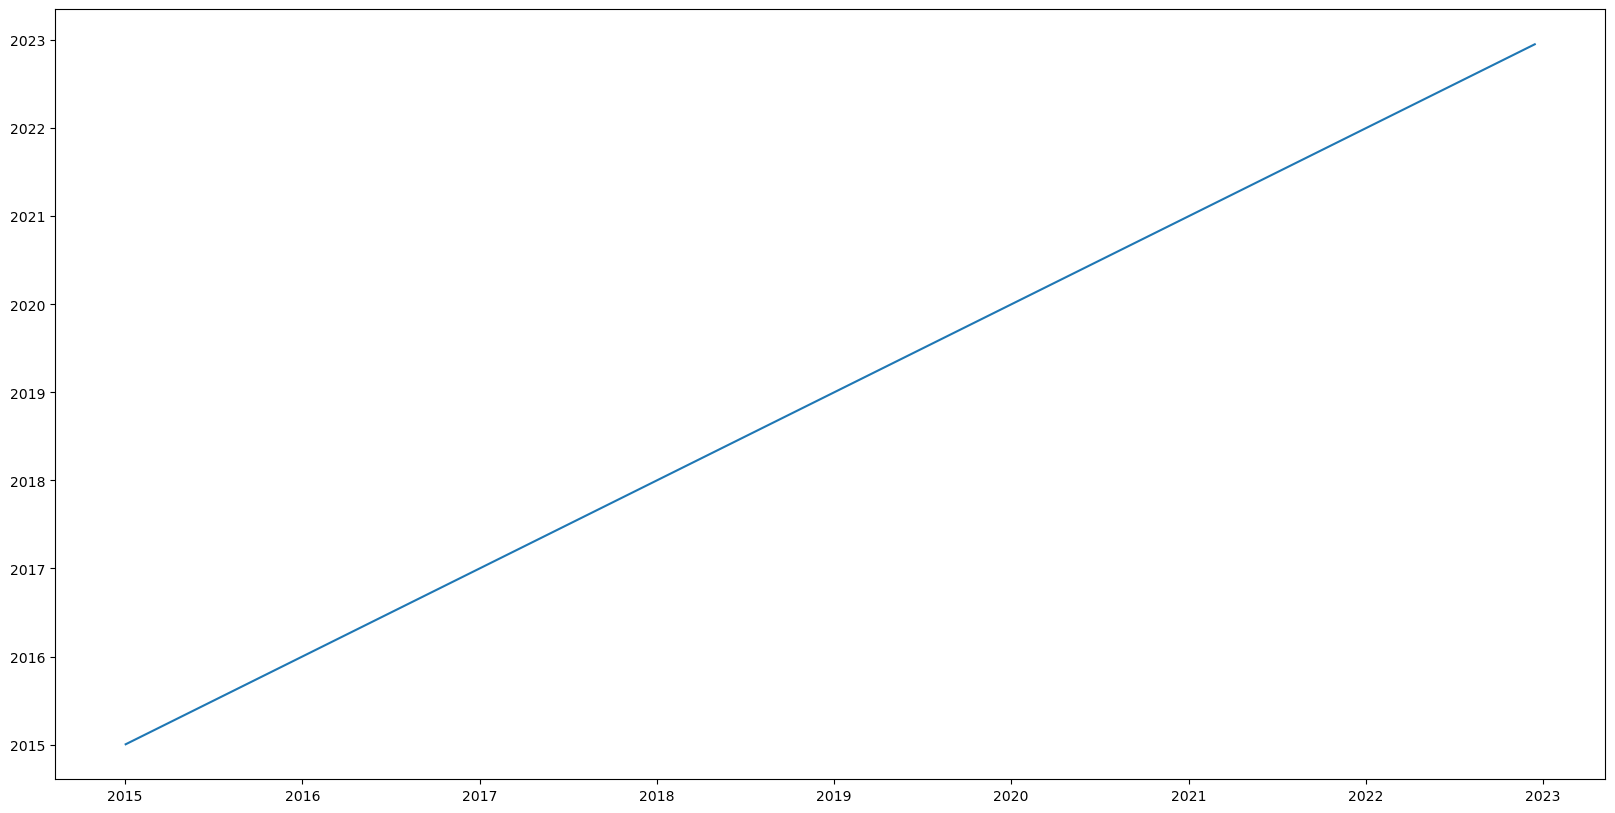

In [44]:
#Analyse the closing price from dataframe
df['Turnover(Lacs)']=pd.to_datetime(df.Date)
df.index=df['Turnover(Lacs)']

plt.figure(figsize=(20,10))
plt.plot(df['Turnover(Lacs)'],label='CloserPriceHist')